In [1]:
#!pip install --user -U pip

In [2]:
#!pip install --user umap-learn

In [3]:
#!pip install --user -U seaborn

In [105]:
#!pip install --user biopython

In [4]:
from Bio import SeqIO
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from umap import UMAP

In [5]:
embedding_pos = np.load("example_embedding_1M_pos.1M.npy")
embedding_pos.shape

(1000000, 512)

In [6]:
embedding_neg = np.load("example_embedding_1M_neg.1M.npy")
embedding_neg.shape

(1000000, 512)

In [7]:
embedding = np.stack((embedding_pos, embedding_neg[::-1])).mean(axis=0)
embedding.shape

(1000000, 512)

In [8]:
latent = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=40))
]).fit_transform(embedding)
latent.shape

(1000000, 40)

In [84]:
window_size = 1000000
center = 3566700

# TODO: find an enhancer example

# TODO: find tranposon example

# would be nice to find an example of a certain protein domain or something interesting about a protein

def plot_latent(latent, start, end):
    latent_zoom = latent[window_size//2+start-center:window_size//2+end-center]
    print(latent_zoom.shape)
    if latent_zoom.shape[1] == 512:  # redo PCA
        print("Running PCA on zoomed-in window")
        latent_zoom = latent = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=40))]).fit_transform(latent_zoom)
        print(latent_zoom.shape)
    
    df2 = pd.DataFrame(data=latent_zoom.T)
    #plt.figure(figsize=(15, 15))
    #plt.figure(figsize=(15, 5))
    plt.figure(figsize=(15, 3))
    sns.heatmap(
        data=df2,
        cmap="bwr",
        center=0,
        square=False,
        yticklabels=1,
        cbar=False,
    )
    #plt.xlabel("pos")
    plt.xticks([], [])
    plt.yticks([], [])
    #plt.ylabel("embedding principal component");

## Promoter, exons
TODO: find better example without something weird on the far left

http://ucsc.gao-lab.org/cgi-bin/hgTracks?db=tair10&lastVirtModeType=default&lastVirtModeExtraState=&virtModeType=default&virtMode=0&nonVirtPosition=&position=Chr5%3A3566700%2D3567700&hgsid=164617_9lNIGAWPpARSj47ipyGVNh4OanwR

(1000, 40)


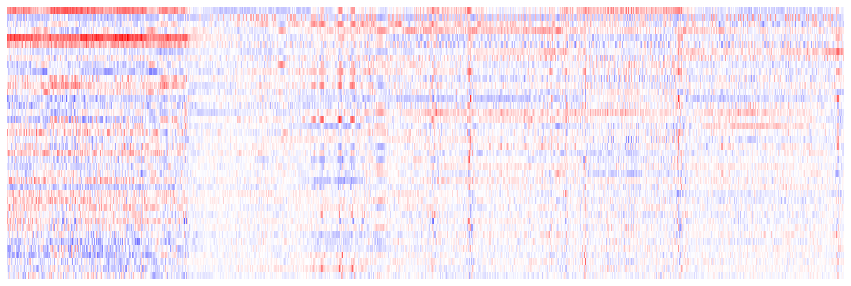

In [10]:
plot_latent(latent, 3566700, 3567700)

(1000, 512)
Running PCA on zoomed-in window
(1000, 40)


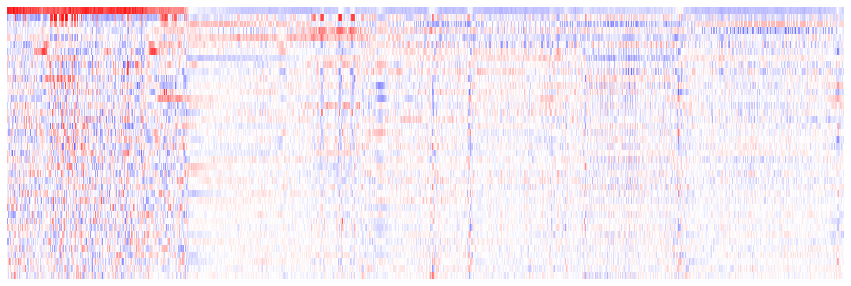

In [11]:
plot_latent(embedding, 3566700, 3567700)

# Example TFBS from FunTFBS
http://ucsc.gao-lab.org/cgi-bin/hgTracks?db=tair10&lastVirtModeType=default&lastVirtModeExtraState=&virtModeType=default&virtMode=0&nonVirtPosition=&position=Chr5%3A3561938%2D3562102&hgsid=164617_9lNIGAWPpARSj47ipyGVNh4OanwR

(164, 40)


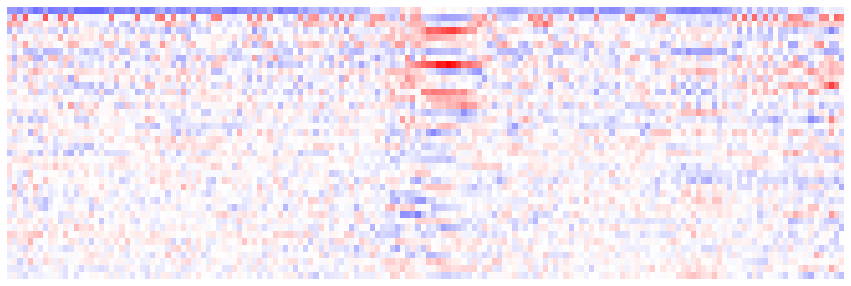

In [12]:
plot_latent(latent, 3561938, 3562102)

(164, 512)
Running PCA on zoomed-in window
(164, 40)


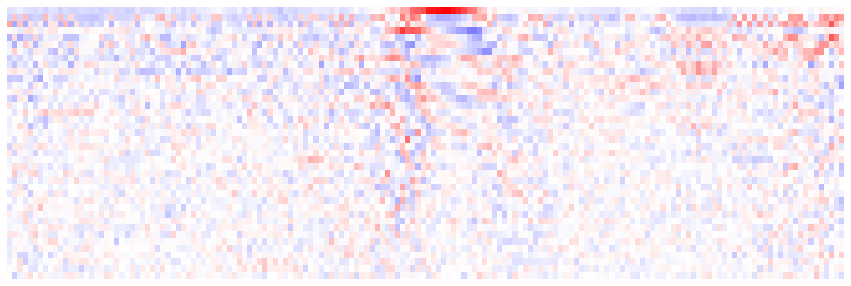

In [13]:
plot_latent(embedding, 3561938, 3562102)

## Start codon
http://ucsc.gao-lab.org/cgi-bin/hgTracks?db=tair10&lastVirtModeType=default&lastVirtModeExtraState=&virtModeType=default&virtMode=0&nonVirtPosition=&position=Chr5%3A3567354%2D3567402&hgsid=164617_9lNIGAWPpARSj47ipyGVNh4OanwR

(49, 40)


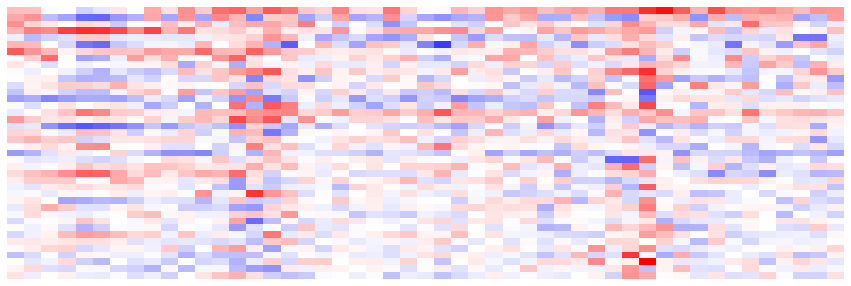

In [14]:
plot_latent(latent, 3567353, 3567402)

(49, 512)
Running PCA on zoomed-in window
(49, 40)


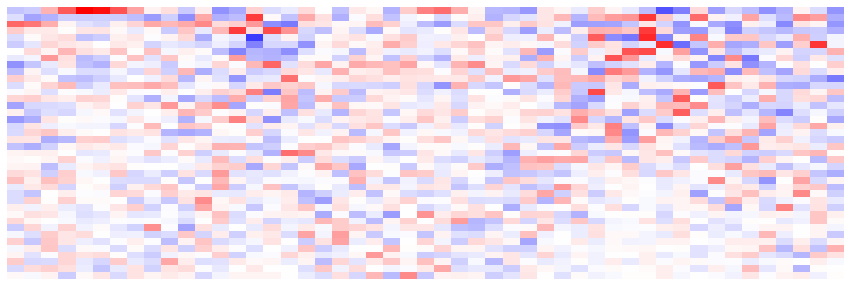

In [15]:
plot_latent(embedding, 3567353, 3567402)

## Alternative splicing
http://ucsc.gao-lab.org/cgi-bin/hgTracks?db=tair10&lastVirtModeType=default&lastVirtModeExtraState=&virtModeType=default&virtMode=0&nonVirtPosition=&position=Chr5%3A3568832%2D3569781&hgsid=164617_9lNIGAWPpARSj47ipyGVNh4OanwR

(950, 40)


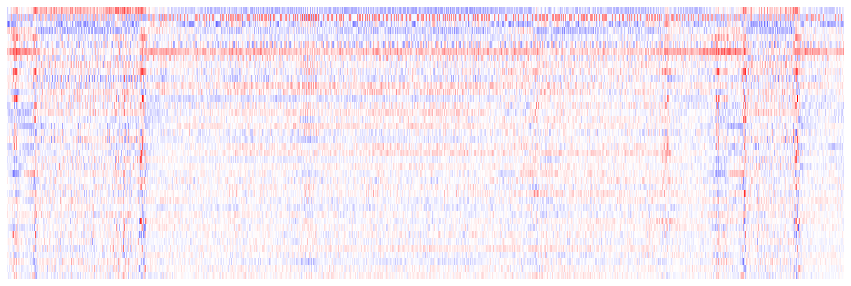

In [16]:
plot_latent(latent, 3568831, 3569781)

(950, 512)
Running PCA on zoomed-in window
(950, 40)


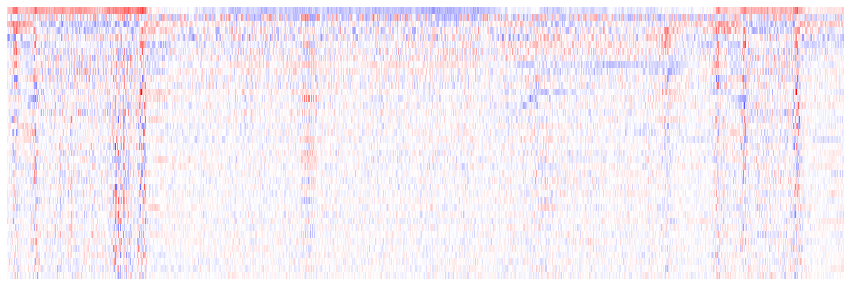

In [17]:
plot_latent(embedding, 3568831, 3569781)

## Gene on the negative strand. there's another thing interesting here, to inspect
http://ucsc.gao-lab.org/cgi-bin/hgTracks?db=tair10&lastVirtModeType=default&lastVirtModeExtraState=&virtModeType=default&virtMode=0&nonVirtPosition=&position=Chr5%3A3557971%2D3558946&hgsid=164617_9lNIGAWPpARSj47ipyGVNh4OanwR

(976, 40)


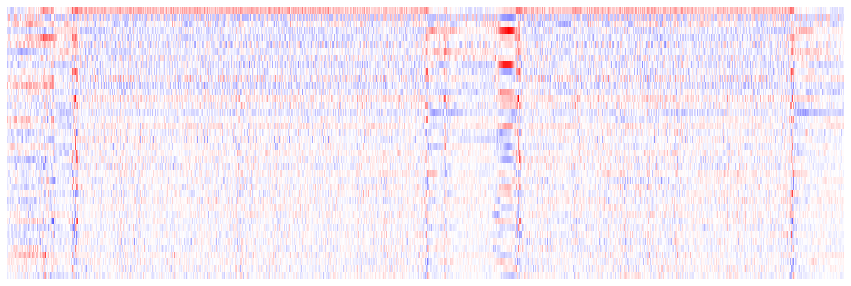

In [18]:
plot_latent(latent, 3557970, 3558946)

(976, 512)
Running PCA on zoomed-in window
(976, 40)


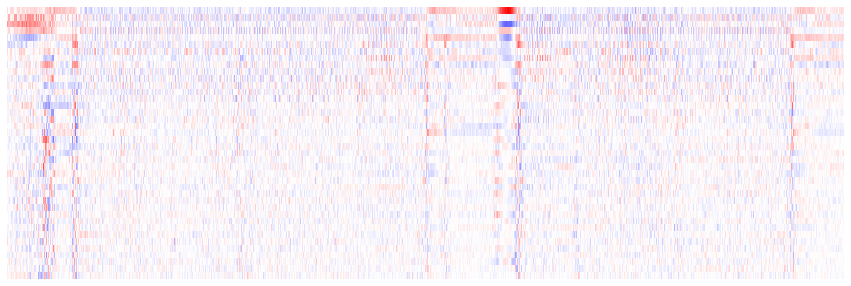

In [19]:
plot_latent(embedding, 3557970, 3558946)

In [80]:
# other examples

(1000, 10)


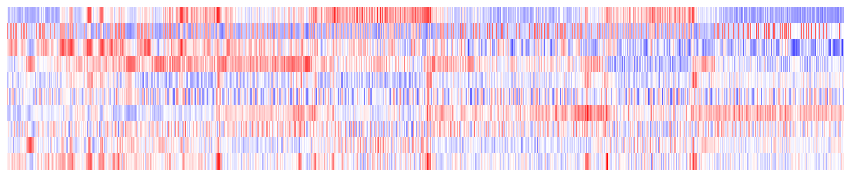

In [87]:
latent = latent[:, :10]
plot_latent(latent, 3567000, 3568000)
plt.savefig("pca_viz.svg", bbox_inches="tight")

In [20]:
"""
for pc in range(1, 21):
    df_bedgraph = pd.DataFrame({
        "chromosome": ["chr5" for _ in range(len(latent_zoom))],
        "start": np.arange(start, end),
        "end": np.arange(start+1, end+1),
        "values": latent_zoom[:, pc-1],
    })
    print(df_bedgraph)

    with open(f'example_bedgraph_PC{pc}.txt', 'a') as file:
        file.write(f'track type=bedGraph name="PC{pc}" description="PC{pc}" visibility=full color=255,0,0 altColor=0,0,255 maxHeightPixels=32\n')
        df_bedgraph.to_csv(file, sep="\t", header=False, index=False)
"""

'\nfor pc in range(1, 21):\n    df_bedgraph = pd.DataFrame({\n        "chromosome": ["chr5" for _ in range(len(latent_zoom))],\n        "start": np.arange(start, end),\n        "end": np.arange(start+1, end+1),\n        "values": latent_zoom[:, pc-1],\n    })\n    print(df_bedgraph)\n\n    with open(f\'example_bedgraph_PC{pc}.txt\', \'a\') as file:\n        file.write(f\'track type=bedGraph name="PC{pc}" description="PC{pc}" visibility=full color=255,0,0 altColor=0,0,255 maxHeightPixels=32\n\')\n        df_bedgraph.to_csv(file, sep="\t", header=False, index=False)\n'

In [21]:
gtf = pd.read_csv(
    "../../data/vep/tair10.gff", sep='\t', header=None, comment="#",
    names=['chromosome', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute'],
)
gtf = gtf[gtf.chromosome=="Chr5"]
gtf.shape

(135017, 9)

In [22]:
# very careful with this, when defining overlaps
#gtf = gtf[gtf.strand=="+"]
#gtf.shape

In [23]:
# To work with the already computed 1Mb embeddings
gtf = gtf[(gtf.start > center-window_size//2) & (gtf.end < center+window_size//2)]
gtf.start -= (center-window_size//2)
gtf.end -= (center-window_size//2)
gtf.shape

(6455, 9)

In [24]:
gtf.feature.value_counts()

exon                         2417
CDS                          2287
protein                       369
mRNA                          367
five_prime_UTR                365
three_prime_UTR               337
gene                          291
tRNA                            7
transposable_element_gene       3
mRNA_TE_gene                    3
ncRNA                           2
miRNA                           2
pseudogenic_exon                2
snoRNA                          1
pseudogene                      1
pseudogenic_transcript          1
Name: feature, dtype: int64

In [25]:
gtf = gtf[gtf.feature != "protein"]  # redundant
gtf = gtf[gtf.feature != "gene"]  # redundant
gtf.shape

(5795, 9)

In [43]:
#gtf.head(100).tail(50)

In [44]:
#df['gene_id'] = df.attribute.str.extract(r'gene_id "([^;]*)";')
#df['transcript_id'] = df.attribute.str.extract(r'transcript_id "([^;]*)"')  # the filtered versions need this
#df['transcript_id'] = df.attribute.str.extract(r'transcript_id "([^;]*)";')

In [26]:
overlaps = pd.Series(["Intergenic"] * window_size)
i = -1
for row_index, row in gtf.iterrows():
    i += 1
    if i % 1000 == 0: print(i)
    overlaps[row.start:row.end] += "," + row.feature
overlaps = overlaps.str.split(",").apply(Counter)

0
1000
2000
3000
4000
5000


In [27]:
overlaps.value_counts()

TypeError: unhashable type: 'Counter'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'Counter'


{'Intergenic': 1}                                                327987
{'Intergenic': 1, 'mRNA': 1, 'exon': 1, 'CDS': 1}                260409
{'Intergenic': 1, 'mRNA': 1}                                     149308
{'Intergenic': 1, 'mRNA': 2, 'CDS': 2, 'exon': 2}                 52858
{'Intergenic': 1, 'mRNA': 2}                                      47920
                                                                  ...  
{'Intergenic': 1, 'mRNA': 4, 'exon': 4, 'CDS': 1}                     1
{'Intergenic': 1, 'mRNA': 3, 'exon': 3, 'CDS': 1}                     1
{'Intergenic': 1, 'mRNA': 3, 'three_prime_UTR': 2, 'exon': 3}         1
{'Intergenic': 1, 'exon': 2}                                          1
{'Intergenic': 1, 'mRNA': 3, 'five_prime_UTR': 1, 'exon': 2}          1
Length: 88, dtype: int64

In [28]:
overlaps.value_counts()[:20]

TypeError: unhashable type: 'Counter'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'Counter'


{'Intergenic': 1}                                                                  327987
{'Intergenic': 1, 'mRNA': 1, 'exon': 1, 'CDS': 1}                                  260409
{'Intergenic': 1, 'mRNA': 1}                                                       149308
{'Intergenic': 1, 'mRNA': 2, 'CDS': 2, 'exon': 2}                                   52858
{'Intergenic': 1, 'mRNA': 2}                                                        47920
{'Intergenic': 1, 'mRNA': 1, 'exon': 1, 'three_prime_UTR': 1}                       40425
{'Intergenic': 1, 'mRNA': 3}                                                        22617
{'Intergenic': 1, 'mRNA': 3, 'CDS': 3, 'exon': 3}                                   20684
{'Intergenic': 1, 'mRNA': 1, 'five_prime_UTR': 1, 'exon': 1}                        19910
{'Intergenic': 1, 'mRNA': 4}                                                         7694
{'Intergenic': 1, 'mRNA': 2, 'three_prime_UTR': 2, 'exon': 2}                        6604
{'Intergen

In [29]:
segmentation = pd.Series([""] * window_size)
segmentation[overlaps==Counter(Intergenic=1)] = "intergenic"
segmentation[overlaps==Counter(Intergenic=1, mRNA=1)] = "intron"  # technically should include all mRNA>=1
segmentation[overlaps==Counter(Intergenic=1, mRNA=1, exon=1, CDS=1)] = "cds"
segmentation[overlaps==Counter(Intergenic=1, mRNA=1, exon=1, five_prime_UTR=1)] = "five_prime_utr"
segmentation[overlaps==Counter(Intergenic=1, mRNA=1, exon=1, three_prime_UTR=1)] = "three_prime_utr"
# can comment this one out, not sure it's working
#segmentation[overlaps==Counter(Intergenic=1, mRNA=2, exon=1, CDS=1)] = "alt_spliced_cds"  # again, could do mRNA>=1, etc.
#segmentation[overlaps==Counter(Intergenic=1, ncRNA=2)] = "ncRNA"
segmentation.value_counts()

intergenic         327987
cds                260409
                   201961
intron             149308
three_prime_utr     40425
five_prime_utr      19910
dtype: int64

In [30]:
segmentation = segmentation[segmentation!=""]
border = 10000
segmentation = segmentation[border:-border]

In [31]:
segmentation_subset = segmentation.groupby(segmentation).sample(n=1000, random_state=42).to_frame().rename(columns={0: "Region"})
segmentation_subset = segmentation_subset.sample(frac=1, random_state=42)  # just shuffle
segmentation_subset

,Region
661943,five_prime_utr
443047,intergenic
291216,intergenic
661958,five_prime_utr
916699,cds
...,...
142903,three_prime_utr
750228,cds
431037,intron
538205,intron


In [33]:
aggregation = "mean"#"concat" #None
n_aggregation = 33#15 # None  # different categories benefit from different n_aggregation

if aggregation is None:
    embedding_subset = embedding[segmentation_subset.index.values]
elif aggregation == "concat":
    embedding_subset = embedding[[np.arange(i-n_aggregation//2, 1+i+n_aggregation//2) for i in segmentation_subset.index.values]].reshape(len(segmentation_subset), -1)
elif aggregation == "mean":
    embedding_subset = embedding[[np.arange(i-n_aggregation//2, 1+i+n_aggregation//2) for i in segmentation_subset.index.values]].sum(axis=1)
embedding_subset.shape

(5000, 512)

In [37]:
genome = SeqIO.to_dict(SeqIO.parse("../../data/mlm/tair10.fa", "fasta"))
segmentation_subset["nucleotide"] = segmentation_subset.apply(lambda row: genome["Chr5"][row.name + center-window_size//2], axis=1)
# here can add more nucleotides
segmentation_subset["nucleotide_window"] = segmentation_subset.apply(
    lambda row: str(genome["Chr5"][row.name + center-window_size//2 - n_aggregation//2:row.name + center-window_size//2 + 1 + n_aggregation//2].seq),
    axis=1
)
segmentation_subset

,Region,nucleotide,UMAP1,UMAP2,nucleotide_window
661943,five_prime_utr,G,1.855152,7.081183,AACTATTCAAAATGAGGAAAAAAAACAGGGCAG
443047,intergenic,A,-0.218887,8.285431,GAGTAGTGACGTCATTATTAATGGTCCCCTCCT
291216,intergenic,T,-3.400862,6.990018,TATTACGGTAATACTATTACCCTAAACTATCAA
661958,five_prime_utr,A,1.798763,7.407197,GGAAAAAAAACAGGGCAGTGAAGTGTGATGAAG
916699,cds,C,10.393890,2.354215,GACTATAGTGGAGTATCTTATCAGTGAAGGAGT
...,...,...,...,...,...
142903,three_prime_utr,C,-2.395289,5.692963,AAAAAATAACTGAAAACATCGACGACAAATGAA
750228,cds,C,6.818849,3.710369,AACTTACGTTTGCCAACATTCACGGATTATCTG
431037,intron,C,5.822465,1.313973,GTATTTATCCATGTATCATACTTTGATAATATA
538205,intron,C,4.388526,5.800305,GTCAAACAGATAAGAACGATCTCAACAATTTCA


In [58]:
k = 5#1
seqs = segmentation_subset.nucleotide_window.values

obj = kmer_featurization(k) 
kmer_features = obj.obtain_kmer_feature_for_a_list_of_sequences(seqs, write_number_of_occurrences=False)
kmer_features

array([[0.13793103, 0.03448276, 0.03448276, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03448276, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [73]:
projector = Pipeline([
    ("scaler", StandardScaler()),  # not sure it's a good idea
    #("pca", PCA(n_components=100)),
    ("umap", UMAP(n_components=2, n_neighbors=30, random_state=42)),  # n_neighbors should change with number of positions
])
segmentation_subset[["UMAP1", "UMAP2"]] = projector.fit_transform(embedding_subset)
#segmentation_subset[["UMAP1", "UMAP2"]] = projector.fit_transform(kmer_features)

In [74]:
#sns.scatterplot(
#    data=segmentation_subset,
#    x="UMAP1",
#    y="UMAP2",
#    hue="nucleotide"
#)

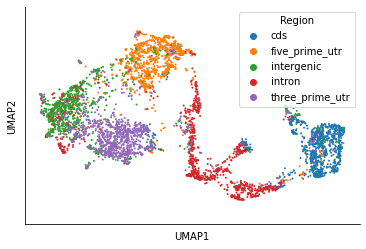

In [79]:
g = sns.scatterplot(
    data=segmentation_subset.sort_values("Region"),
    x="UMAP1",
    y="UMAP2",
    hue="Region",
    s=4,
    linewidth=0,
)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
sns.despine()
plt.xticks([], [])
plt.yticks([], [])
#g.get_legend().set_title("Region")
plt.axis('equal');
plt.savefig("umap_embedding.svg", bbox_inches="tight");

### Few-shot classification

In [190]:
segmentation = segmentation[segmentation!=""]
border = 10000
print(segmentation.shape)
segmentation = segmentation[border:-border]
print(segmentation.shape)
print(segmentation.value_counts())

(798039,)
(778039,)
intergenic         318549
cds                254251
intron             146106
three_prime_utr     39533
five_prime_utr      19600
dtype: int64


In [70]:
n_train, n_test = 10, 10000
assert(n_train+n_test < 19000)
segmentation_subset = segmentation.groupby(segmentation).sample(n=n_train+n_test, random_state=42).to_frame().rename(columns={0: "Region"})

aggregation = "mean"#"concat" #None
n_aggregation = 33#15#31 # None  # different categories benefit from different n_aggregation

if aggregation is None:
    embedding_subset = embedding[segmentation_subset.index.values]
elif aggregation == "concat":
    embedding_subset = embedding[[np.arange(i-n_aggregation//2, 1+i+n_aggregation//2) for i in segmentation_subset.index.values]].reshape(len(segmentation_subset), -1)
elif aggregation == "mean":
    embedding_subset = embedding[[np.arange(i-n_aggregation//2, 1+i+n_aggregation//2) for i in segmentation_subset.index.values]].sum(axis=1)

In [71]:
embedding_subset.shape

(50050, 512)

In [72]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split

X = embedding_subset
y = segmentation_subset.Region

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=n_train*len(y.unique()), random_state=42, stratify=y)

In [73]:
# TODO: figure out if n_jobs works well

clf = Pipeline([
    ("scaler", StandardScaler()),
    ("regression", LogisticRegressionCV(max_iter=10000, verbose=1, random_state=42, cv=10, Cs=100))
])

In [74]:
clf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    6.3s finished


Pipeline(steps=[('scaler', StandardScaler()),
                ('regression',
                 LogisticRegressionCV(Cs=100, cv=10, max_iter=10000,
                                      random_state=42, verbose=1))])

In [75]:
y_pred = clf.predict(X_test)

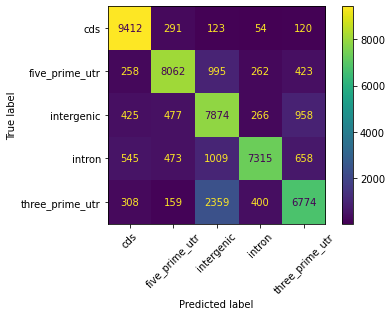

In [76]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.xticks(rotation=45);

In [44]:
# source: https://github.com/MindAI/kmer

class kmer_featurization:

  def __init__(self, k):
    """
    seqs: a list of DNA sequences
    k: the "k" in k-mer
    """
    self.k = k
    self.letters = ['A', 'T', 'C', 'G']
    self.multiplyBy = 4 ** np.arange(k-1, -1, -1) # the multiplying number for each digit position in the k-number system
    self.n = 4**k # number of possible k-mers

  def obtain_kmer_feature_for_a_list_of_sequences(self, seqs, write_number_of_occurrences=False):
    """
    Given a list of m DNA sequences, return a 2-d array with shape (m, 4**k) for the 1-hot representation of the kmer features.
    Args:
      write_number_of_occurrences:
        a boolean. If False, then in the 1-hot representation, the percentage of the occurrence of a kmer will be recorded; otherwise the number of occurrences will be recorded. Default False.    
    """
    kmer_features = []
    for seq in seqs:
      this_kmer_feature = self.obtain_kmer_feature_for_one_sequence(seq.upper(), write_number_of_occurrences=write_number_of_occurrences)
      kmer_features.append(this_kmer_feature)

    kmer_features = np.array(kmer_features)

    return kmer_features

  def obtain_kmer_feature_for_one_sequence(self, seq, write_number_of_occurrences=False):
    """
    Given a DNA sequence, return the 1-hot representation of its kmer feature.
    Args:
      seq: 
        a string, a DNA sequence
      write_number_of_occurrences:
        a boolean. If False, then in the 1-hot representation, the percentage of the occurrence of a kmer will be recorded; otherwise the number of occurrences will be recorded. Default False.
    """
    number_of_kmers = len(seq) - self.k + 1

    kmer_feature = np.zeros(self.n)

    for i in range(number_of_kmers):
      this_kmer = seq[i:(i+self.k)]
      this_numbering = self.kmer_numbering_for_one_kmer(this_kmer)
      kmer_feature[this_numbering] += 1

    if not write_number_of_occurrences:
      kmer_feature = kmer_feature / number_of_kmers

    return kmer_feature

  def kmer_numbering_for_one_kmer(self, kmer):
    """
    Given a k-mer, return its numbering (the 0-based position in 1-hot representation)
    """
    digits = []
    for letter in kmer:
      digits.append(self.letters.index(letter))

    digits = np.array(digits)

    numbering = (digits * self.multiplyBy).sum()

    return numbering